### DATASET link : https://www.kaggle.com/mlg-ulb/creditcardfraud/code?datasetId=310&sortBy=voteCount

# Credit Card Fraud Detection Using Machine Learning Algorithms 

#### In this project we will not be balancing the dataset, we will be testing the models on the dataset as it is with imbalance dataset.

#### The goal of this project is to track the pattern of all the transactions and if any pattern is abnormal then the transaction should be classified as fraud.

#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
import sklearn.metrics as metrics


#### Import CSV file

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
dataset.drop('Time',inplace=True,axis = 1)

In [5]:
# check the shape of dataset
dataset.shape

(284807, 30)

so we have a total of 284807 transaction    

lets check for nan values

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.shape

(284807, 30)

Thus we can see no data has been dropped

##### we need to check for any duplicate transaction taking place and remove it if present to bring down the runtime of the model.

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.shape

(275663, 30)

In [10]:
284807-275663

9144

Thus we removed 9144 duplicates form the dataset.

<AxesSubplot:>

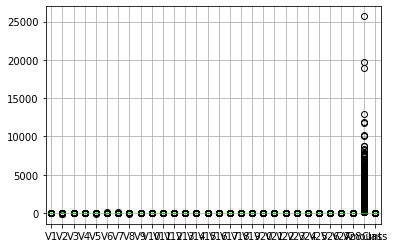

In [11]:
dataset.boxplot(figsize= (15,15))

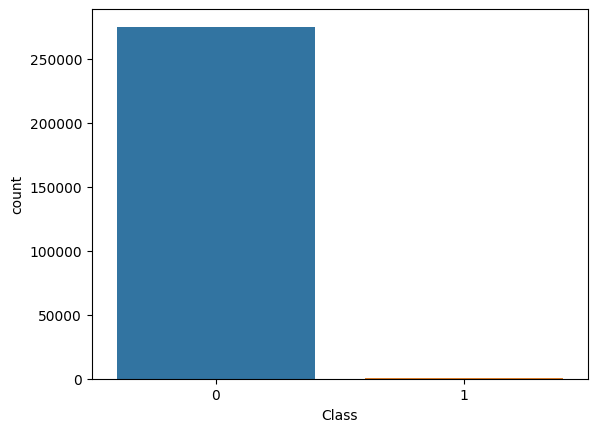

In [12]:
sns.countplot('Class',data = dataset);

In [13]:
# lets check for number of normal and fraud transaction
fraud = len(dataset[dataset['Class'] == 1])
normal = len(dataset[dataset['Class'] == 0])
percent_normal = normal/len(dataset)*100
percent_fraud = fraud/len(dataset)*100

In [14]:
print('Number of Fraud Transactions are: {}'.format(fraud))
print('Number of Normal Transactions are: {}'.format(normal))
print(' ')
print('Percentage of Fraud Transactions are: {:.2f}%'.format(percent_fraud))
print('Percentage of Normal Transactions are: {:.2f}%'.format(percent_normal))


Number of Fraud Transactions are: 473
Number of Normal Transactions are: 275190
 
Percentage of Fraud Transactions are: 0.17%
Percentage of Normal Transactions are: 99.83%


In [15]:
X = dataset.drop(['Class'],axis=1)
y = dataset['Class']

In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify= y)

In [18]:
normal_res = len(y_train[y_train == 0])
fraud_res = len(y_train[y_train == 1])

In [19]:
print('Number of normal transaction in y_train are: {}'.format(normal_res))
print('Number of fraud transaction in y_train are: {}'.format(fraud_res))

Number of normal transaction in y_train are: 192633
Number of fraud transaction in y_train are: 331


#### thus we can see both the class type are equally distributed in the y_train set

In [20]:
# since most of our columns are scaled we need to scale the amount variable

# We will use RobustScaler as it is less prone to outliers since it uses median to scale the data and median is not affected by outliers(inshort it preserves the outliers) 
# and in case of standardscaler it uses mean to scale the data.

from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In [21]:
X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.transform(X_test['Amount'].values.reshape(-1,1))

In [22]:
X_test.drop(['Amount'], axis=1, inplace=True)
X_train.drop(['Amount'], axis=1, inplace=True)

In [23]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
252961,-0.002649,1.709556,0.489033,4.506091,1.136082,-0.056107,1.149369,-0.226655,-2.336846,1.698369,...,0.374345,0.088556,0.555597,-0.114092,0.090210,-0.460603,0.383906,0.454328,0.275464,-0.159956
22290,-0.441228,0.522613,2.056708,0.273655,-0.561277,-0.182498,0.442255,0.014473,0.072116,-0.733788,...,0.122673,0.180025,0.662586,-0.144130,0.460255,0.078934,0.464752,0.044296,0.064489,0.489663
280019,-0.545032,-1.041010,1.747492,-2.535783,-0.446934,-0.326937,-1.035116,0.408528,-0.024587,-0.127417,...,-0.019667,0.622983,1.530363,0.031505,-0.350877,-0.974450,-0.418697,0.212298,0.227124,-0.053047
141767,1.306569,-0.283383,0.587596,-0.931606,-0.698749,-0.324476,-0.507541,-0.049893,1.696392,-1.113906,...,-0.021855,-0.053475,0.159801,-0.154437,-0.411223,0.652536,-0.638002,0.100529,0.029255,-0.311480
17279,-0.587835,-2.993923,0.020439,1.661459,-1.668793,0.273742,0.779287,-0.150220,0.750782,-0.800855,...,1.691114,0.452124,-0.322407,-0.787034,0.534481,0.091071,0.440215,-0.152130,0.169807,11.900979


In [24]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
194684,2.060595,-0.800830,-1.022627,-0.823464,-0.853588,-1.370926,-0.332048,-0.366907,-0.926808,1.000320,...,0.098699,0.570817,1.583347,-0.002528,0.637096,0.098463,0.013673,-0.040759,-0.059892,0.421654
139815,1.344839,-1.278537,0.522994,-1.470681,-1.575902,-0.383679,-1.096722,-0.023559,-1.974066,1.552463,...,-0.161566,-0.296573,-0.701976,0.063528,-0.058951,0.116915,-0.413950,0.024919,0.028485,0.824266
267275,0.036577,0.857407,0.301358,-0.580349,0.423443,-1.144374,0.994537,-0.206516,-0.043969,-0.407697,...,-0.039455,-0.259930,-0.569864,0.068311,0.039827,-0.490446,0.137789,0.247474,0.097668,-0.312976
259742,-0.756032,0.387262,-1.758907,-1.375359,2.790965,3.220127,0.056107,1.281056,-0.385939,-0.604053,...,0.202370,0.454641,1.081437,-0.010334,0.736608,-0.344308,-0.126207,0.342812,0.157428,0.504489
99089,-0.279155,-0.044119,2.053473,-0.448983,-0.264138,1.728925,-0.545968,0.565432,1.080615,-0.865548,...,0.105995,-0.089820,0.182072,-0.365608,-1.256854,0.064613,1.176098,0.024794,-0.001907,0.010201


### Lets build the machine learning model 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#### Due to the length of dataset we will using simple Random forest classifier & Logistic Regression without hyperparameter tuning

In [27]:
classifiers1 =  RandomForestClassifier()

In [28]:
skf = StratifiedKFold(n_splits=5)
classifiers1.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
training_score = cross_val_score(classifiers1, X_train, y_train, cv=skf)
print("Classifiers: ", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  100.0 % accuracy score


In [30]:
y_pred = classifiers1.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, fbeta_score

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[82547,    10],
       [   36,   106]], dtype=int64)

In [33]:
normal_res1 = len(y_test[y_test == 0])
fraud_res1 = len(y_test[y_test == 1])

In [34]:
normal_res1, fraud_res1

(82557, 142)

In [35]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True negative = ', cm[0][0])
    print('False negative = ', cm[1][0])
    print('False positive = ', cm[0][1])
    print('True positive = ', cm[1][1])

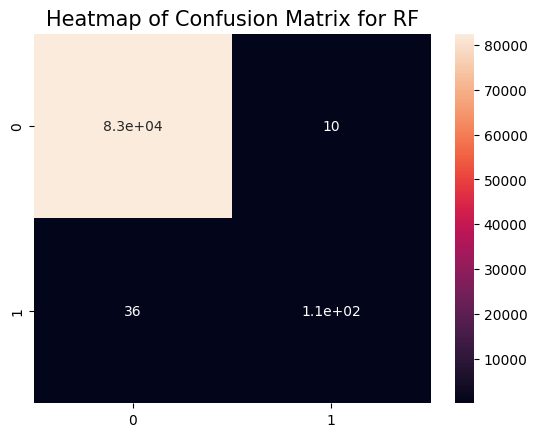

In [36]:
plt.title('Heatmap of Confusion Matrix for RF', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       0.91      0.75      0.82       142

    accuracy                           1.00     82699
   macro avg       0.96      0.87      0.91     82699
weighted avg       1.00      1.00      1.00     82699



In [38]:
accuracy_score(y_test, y_pred)

0.9994437659463838

In [39]:
precision_score(y_test, y_pred)

0.9137931034482759

In [40]:
recall_score(y_test, y_pred)

0.7464788732394366

In [41]:
print_confusion_matrix(y_test, y_pred)

True negative =  82547
False negative =  36
False positive =  10
True positive =  106


In [42]:
fb_rf = fbeta_score(y_test, y_pred, beta=1)
fb_rf

0.8217054263565892

## Logistic Regression

In [43]:
clf_lr = LogisticRegression()

In [44]:
skf = StratifiedKFold(n_splits=5)
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
training_score_lr = cross_val_score(clf_lr, X_train, y_train, cv=skf)
print("Classifiers: ", round(training_score_lr.mean(), 2) * 100, "% accuracy score")

Classifiers:  100.0 % accuracy score


In [46]:
y_pred_lr = clf_lr.predict(X_test)

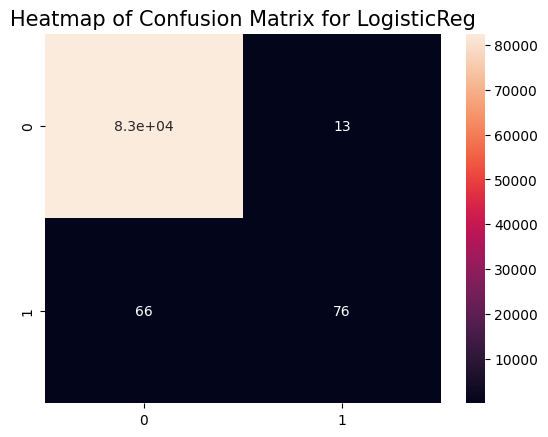

In [47]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.title('Heatmap of Confusion Matrix for LogisticReg', fontsize = 15)
sns.heatmap(cm_lr, annot = True)
plt.show()

In [48]:
print_confusion_matrix(y_test, y_pred_lr)

True negative =  82544
False negative =  66
False positive =  13
True positive =  76


In [49]:
accuracy_score(y_test,y_pred_lr)

0.9990447284731375

In [50]:
precision_score(y_test,y_pred_lr)

0.8539325842696629

In [51]:
recall_score(y_test,y_pred_lr)

0.5352112676056338

In [52]:
fb_lr = fbeta_score(y_test, y_pred_lr, beta=1)
fb_lr

0.6580086580086579

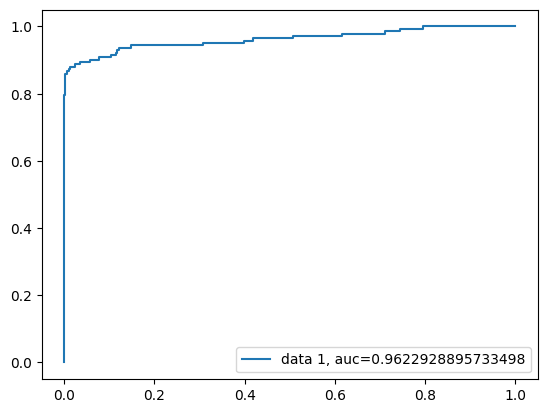

In [53]:
y_pred_proba = clf_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [54]:
import scikitplot as skplt #to make things easy


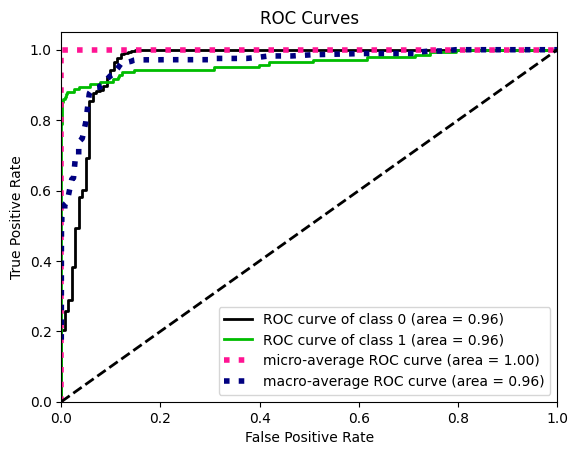

In [55]:
y_pred_prob = clf_lr.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_prob)
plt.show()

### Final Result

In [56]:
list = [fb_lr,fb_rf]


if (fb_lr == max(list)):
    print('The best F1 score is {:.7f} for Logistic Regression model.'.format(fb_lr))
else: 
    print('The best F1 score is {:.7f} for Random Forest model.'.format(fb_rf))

The best F1 score is 0.8217054 for Random Forest model.


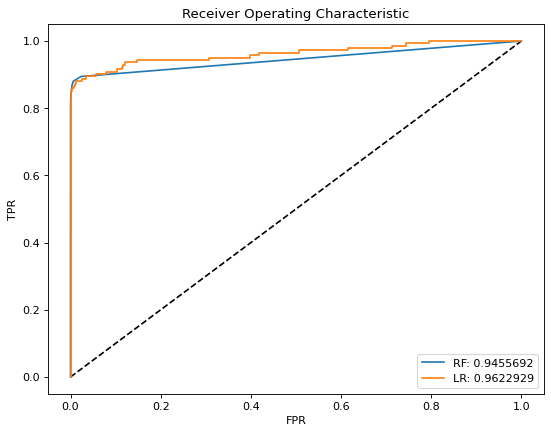

In [57]:
#ROC Curve

figure(figsize=(8, 6), dpi=80)
from sklearn.metrics import roc_curve
y_pred_prob1 = classifiers1.predict_proba(X_test)[:,1]

fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob1),7)

# y_pred_prob2 = clf_gnb.predict_proba(X_test)[:,1]
# fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
# auc2 = round(metrics.roc_auc_score(y_test, y_pred_prob2),4)

y_pred_prob3 = clf_lr.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
auc3 = round(metrics.roc_auc_score(y_test, y_pred_prob3),7)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RF: "+str(auc))
# plt.plot(fpr2, tpr2, label= "GNB: "+str(auc2) )
plt.plot(fpr3, tpr3, label= "LR: "+str(auc3))

plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()